# Week 2, Data Ingestion

Data requirements taken from: https://pypi.org/project/Fedtools/

In [1]:
!pip install Fedtools

from FedTools import MonetaryPolicyCommittee
from FedTools import BeigeBooks
from FedTools import FederalReserveMins

import pandas as pd

from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable


In [2]:
fed_mins = FederalReserveMins(
            main_url = 'https://www.federalreserve.gov', 
            calendar_url ='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
            start_year = 1973,        
            historical_split = 2017,
            verbose = True,
            thread_num = 10)

dataset = fed_mins.find_minutes()

Constructing links between 1973 and 2023
Extracting Federal Reserve Minutes.
Retrieving articles.
..........................................................................................................................................................................................................................................................

In [3]:
dataset

,Federal_Reserve_Mins
1993-02-03,A meeting of the Federal Open Market Committee...
1993-03-23,A meeting of the Federal Open Market Committee...
1993-05-18,A meeting of the Federal Open Market Committee...
1993-07-07,A meeting of the Federal Open Market Committee...
1993-08-17,A meeting of the Federal Open Market Committee...
...,...
2022-11-02,"The Federal Reserve, the central bank of the U..."
2022-12-14,"The Federal Reserve, the central bank of the U..."
2023-02-01,"The Federal Reserve, the central bank of the U..."
2023-03-22,"The Federal Reserve, the central bank of the U..."


In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abact\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abact\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abact\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Python ingestion, cleaning and joining done in R, translated and troubleshot by ChatGPT 4

In [5]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the preprocessed tokens back to a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply text preprocessing to the 'Minutes' column
dataset['Preprocessed Text'] = dataset['Federal_Reserve_Mins'].apply(preprocess_text)

In [6]:
dataset

,Federal_Reserve_Mins,Preprocessed Text
1993-02-03,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-03-23,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-05-18,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-07-07,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
1993-08-17,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...
...,...,...
2022-11-02,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...
2022-12-14,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...
2023-02-01,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...
2023-03-22,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...


In [7]:
dataset['Date'] = dataset.index.date

In [8]:
dataset

,Federal_Reserve_Mins,Preprocessed Text,Date
1993-02-03,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03
1993-03-23,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23
1993-05-18,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18
1993-07-07,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07
1993-08-17,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17
...,...,...,...
2022-11-02,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02
2022-12-14,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14
2023-02-01,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01
2023-03-22,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22


In [9]:
date_column = dataset['Date']

# Create a new DataFrame with just the "date" column
date_data = pd.DataFrame(date_column)

# Save the "date" column as a CSV file
date_data.to_csv('date_column.csv', index=False)

In [10]:
# Save the "date" column as a CSV file
dataset.to_csv('minutes_data.csv', index=False)

Federal Reserve Open Market Operations seem to only exist on their website: https://www.federalreserve.gov/monetarypolicy/openmarket.htm
Had to download it manually and clean the dates and data

In [11]:
excel_file_path = r"C:\Users\abact\BC-Project\data\external\Fed Policy Action.xlsx"

# Read the Excel file into a pandas DataFrame
policy = pd.read_excel(excel_file_path)

# Print the data
print(policy)

          Date  Difference  Increase  Decrease  Level
0   1993-04-09       -0.25      0.00      0.25   3.75
1   1993-07-02       -0.50      0.00      0.50   3.25
2   1993-09-04       -0.25      0.00      0.25   3.00
3   1994-02-04        0.25      0.25      0.00   3.25
4   1994-03-22        0.25      0.25      0.00   3.50
..         ...         ...       ...       ...    ...
112 2022-11-01        0.75      0.75      0.00   4.00
113 2022-12-13        0.50      0.50      0.00   4.50
114 2023-01-31        0.25      0.25      0.00   4.75
115 2023-03-21        0.25      0.25      0.00   5.00
116 2023-05-02        0.25      0.25      0.00   5.25

[117 rows x 5 columns]


We merge the two dataframes in a right join to the existing dataset, since we want to later input data for "No policy change"

In [12]:
# Convert 'Date' column to datetime data type in both DataFrames
dataset['Date'] = pd.to_datetime(dataset['Date'])
policy['Date'] = pd.to_datetime(policy['Date'])

# Sort the 'dataset' DataFrame by 'Date'
dataset_sorted = dataset.sort_values('Date')

# Sort the 'policy' DataFrame by 'Date'
policy_sorted = policy.sort_values('Date')

# Perform the merge operation with sorted DataFrames, using 'Date' column and 5-day tolerance
merged_data = pd.merge_asof(dataset_sorted, policy_sorted, on='Date', tolerance=pd.Timedelta(days=5))

# Print the merged data
print(merged_data)

                                  Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text       Date  Difference  \
0    meeting federal open market committee held off... 1993-02-03         NaN   
1    meeting federal open market committee held off... 1993-03-23         NaN   
2    meeting federal open market committee held off... 1993-

We need to input data that shows no difference in rates when they had a meeting but not policy shift. We also need to input the target Federal Funds rate for meetings where there was no change (the last rate that was observed)

In [13]:
# Replace NA values in 'Difference', 'Increase', and 'Decrease' columns with zeroes
merged_data[['Difference', 'Increase', 'Decrease']] = merged_data[['Difference', 'Increase', 'Decrease']].fillna(0)

# Fill NA values in 'Level' column with value from the row above (forward fill)
merged_data['Level'] = merged_data['Level'].fillna(method='ffill')

merged_data['Level'] = merged_data['Level'].fillna(3.75)

merged_data

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25
...,...,...,...,...,...,...,...
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75
240,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22,0.25,0.25,0.0,5.00


In [14]:
na_counts = merged_data.isna().sum()

# Print the number of NA values in each column
print(na_counts)

Federal_Reserve_Mins    0
Preprocessed Text       0
Date                    0
Difference              0
Increase                0
Decrease                0
Level                   0
dtype: int64


In [15]:
!pip install fredapi
from fredapi import Fred
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


In [16]:
fred = Fred(api_key='ada1a8ba0569ed784226f2c26db44ab1')

###There is a bit of trouble in obtaining macroeconomic data for predictive purposes and also merging with our current dataset. First is the availability of data. Long-Term and Short-Term Treasury Bond Rates are available 24/7 and are available for analysis just as frequently. Other macroeconomic variables, however, are published intermittently and on specific dates every month. This poses a certain complication from a data ingestion perspective, as the FOMC Meeting Schedule occurs on different days of the month, 8 times a year, and varying from year to year. Further, they meet on sporadic occassions when the state of the economy is dire enough (they met three times during March of 2020, the height of the Covid pandemic spread). Lastly, the whole purpose of this paper is to predict the actions of the following FOMC. From a model creation perspective as well as a data merge perspective, it may be best to merge the last known release of data before the FOMC meeting in question. That way, future uses of the model can have the same predictive power as this paper.

In [17]:
# Specify the series ID for the CPI data
cpi_series_id = 'CPIAUCSL'  # CPI All Items Index

# Fetch monthly CPI data from FRED starting from January 1, 1993
cpi_data = fred.get_series(cpi_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and CPI columns
cpi_df = pd.DataFrame({'Date': cpi_data.index, 'CPI': cpi_data.values})

# Print the DataFrame
print(cpi_df)

          Date      CPI
0   1947-01-01   21.480
1   1947-02-01   21.620
2   1947-03-01   22.000
3   1947-04-01   22.000
4   1947-05-01   21.950
..         ...      ...
912 2023-01-01  300.536
913 2023-02-01  301.648
914 2023-03-01  301.808
915 2023-04-01  302.918
916 2023-05-01  303.294

[917 rows x 2 columns]


In [18]:
# Specify the series ID for the real nonfarm payroll data
payroll_series_id = 'PAYEMS'  # All Employees: Total Nonfarm Payrolls

# Fetch monthly real nonfarm payroll data from FRED starting from January 1, 1993
payroll_data = fred.get_series(payroll_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Nonfarm Payroll columns
payroll_df = pd.DataFrame({'Date': payroll_data.index, 'Nonfarm Payroll': payroll_data.values})

# Print the DataFrame
print(payroll_df)

           Date  Nonfarm Payroll
0    1939-01-01          29923.0
1    1939-02-01          30100.0
2    1939-03-01          30280.0
3    1939-04-01          30094.0
4    1939-05-01          30299.0
...         ...              ...
1008 2023-01-01         155007.0
1009 2023-02-01         155255.0
1010 2023-03-01         155472.0
1011 2023-04-01         155766.0
1012 2023-05-01         156105.0

[1013 rows x 2 columns]


In [19]:
# Specify the series ID for the weekly unemployment data
unemployment_series_id = 'UNRATE'  # Civilian Unemployment Rate

# Fetch weekly unemployment data from FRED starting from January 1, 1993
unemployment_data = fred.get_series(unemployment_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Unemployment Rate columns
unemployment_df = pd.DataFrame({'Date': unemployment_data.index, 'Unemployment Rate': unemployment_data.values})

# Print the DataFrame
print(unemployment_df)

          Date  Unemployment Rate
0   1948-01-01                3.4
1   1948-02-01                3.8
2   1948-03-01                4.0
3   1948-04-01                3.9
4   1948-05-01                3.5
..         ...                ...
900 2023-01-01                3.4
901 2023-02-01                3.6
902 2023-03-01                3.5
903 2023-04-01                3.4
904 2023-05-01                3.7

[905 rows x 2 columns]


In [20]:
# Specify the series ID for the consumer sentiment data
sentiment_series_id = 'UMCSENT'  # University of Michigan: Consumer Sentiment

# Fetch monthly consumer sentiment data from FRED starting from January 1, 1993
sentiment_data = fred.get_series(sentiment_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Consumer Sentiment columns
sentiment_df = pd.DataFrame({'Date': sentiment_data.index, 'Consumer Sentiment': sentiment_data.values})

# Print the DataFrame
print(sentiment_df)

          Date  Consumer Sentiment
0   1952-11-01                86.2
1   1952-12-01                 NaN
2   1953-01-01                 NaN
3   1953-02-01                90.7
4   1953-03-01                 NaN
..         ...                 ...
841 2022-12-01                59.7
842 2023-01-01                64.9
843 2023-02-01                67.0
844 2023-03-01                62.0
845 2023-04-01                63.5

[846 rows x 2 columns]


In [21]:
# Specify the series ID for the retail sales data
retail_sales_series_id = 'RSXFS'  # Advance Retail Sales: Retail and Food Services

# Fetch monthly retail sales data from FRED starting from January 1, 1993
retail_sales_data = fred.get_series(retail_sales_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Retail Sales columns
retail_sales_df = pd.DataFrame({'Date': retail_sales_data.index, 'Retail Sales': retail_sales_data.values})

# Print the DataFrame
print(retail_sales_df)

          Date  Retail Sales
0   1992-01-01      146925.0
1   1992-02-01      147223.0
2   1992-03-01      146805.0
3   1992-04-01      148032.0
4   1992-05-01      149010.0
..         ...           ...
372 2023-01-01      603211.0
373 2023-02-01      600669.0
374 2023-03-01      594281.0
375 2023-04-01      596523.0
376 2023-05-01      598576.0

[377 rows x 2 columns]


In [22]:
# Specify the series ID for the durable goods orders data
durable_goods_series_id = 'DGORDER'  # Manufacturers' New Orders: Durable Goods

# Fetch monthly durable goods orders data from FRED starting from January 1, 1993
durable_goods_data = fred.get_series(durable_goods_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Durable Goods Orders columns
durable_goods_df = pd.DataFrame({'Date': durable_goods_data.index, 'Durable Goods Orders': durable_goods_data.values})

# Print the DataFrame
print(durable_goods_df)

          Date  Durable Goods Orders
0   1958-02-01                   NaN
1   1958-03-01                   NaN
2   1958-04-01                   NaN
3   1958-05-01                   NaN
4   1958-06-01                   NaN
..         ...                   ...
778 2022-12-01              281966.0
779 2023-01-01              278372.0
780 2023-02-01              270825.0
781 2023-03-01              279837.0
782 2023-04-01              282833.0

[783 rows x 2 columns]


In [23]:
# Specify the series ID for short-term Treasury bonds
treasury_series_id = 'DTB3'  # 3-Month Treasury Bill: Secondary Market Rate

# Fetch daily data for short-term Treasury bonds from FRED starting from January 1, 1993
treasury_data = fred.get_series(treasury_series_id, start_date='1993-01-01')

# Create a DataFrame with the Date and Treasury Bond Rate columns
short_treasury_df = pd.DataFrame({'Date': treasury_data.index, 'Short-Term Treasury Bond Rate': treasury_data.values})

# Print the DataFrame
print(short_treasury_df)

            Date  Short-Term Treasury Bond Rate
0     1954-01-04                           1.33
1     1954-01-05                           1.28
2     1954-01-06                           1.28
3     1954-01-07                           1.31
4     1954-01-08                           1.31
...          ...                            ...
18114 2023-06-09                           5.11
18115 2023-06-12                           5.14
18116 2023-06-13                           5.11
18117 2023-06-14                           5.10
18118 2023-06-15                           5.07

[18119 rows x 2 columns]


In [24]:
# Specify the series ID for long-term Treasury bonds
treasury_series_id = 'GS10'  # 10-Year Treasury Constant Maturity Rate

# Fetch daily data for long-term Treasury bonds from FRED starting from January 1, 1993
treasury_data = fred.get_series(treasury_series_id, start_date='1993-01-01')

# Create a DataFrame with the Date and Treasury Bond Rate columns
long_treasury_df = pd.DataFrame({'Date': treasury_data.index, 'Long-Term Treasury Bond Rate': treasury_data.values})

# Print the DataFrame
print(long_treasury_df)

          Date  Long-Term Treasury Bond Rate
0   1953-04-01                          2.83
1   1953-05-01                          3.05
2   1953-06-01                          3.11
3   1953-07-01                          2.93
4   1953-08-01                          2.95
..         ...                           ...
837 2023-01-01                          3.53
838 2023-02-01                          3.75
839 2023-03-01                          3.66
840 2023-04-01                          3.46
841 2023-05-01                          3.57

[842 rows x 2 columns]


In [25]:
# Specify the series ID for Liabilities and Capital: Liabilities: Deposits with F.R. Banks, Other Than Reserve Balances
reserves_series_id = 'WTREGEN'  # Liabilities and Capital: Liabilities: Deposits with F.R. Banks, Other Than Reserve Balances

# Fetch bank reserves data from FRED
reserves_data = fred.get_series(reserves_series_id)

# Create a DataFrame with the Date and Bank Reserves columns
reserves_df = pd.DataFrame({'Date': reserves_data.index, 'Bank Reserves': reserves_data.values})

# Convert reserves_data Series to a DataFrame
reserves_df = pd.DataFrame({'Date': reserves_data.index, 'Bank Reserves': reserves_data.values})

# Print the DataFrame
print(reserves_df)

           Date  Bank Reserves
0    1986-01-08          4.140
1    1986-01-15          5.032
2    1986-01-22         13.856
3    1986-01-29         17.487
4    1986-02-05         12.475
...         ...            ...
1949 2023-05-17        116.220
1950 2023-05-24         61.952
1951 2023-05-31         48.954
1952 2023-06-07         44.756
1953 2023-06-14        102.118

[1954 rows x 2 columns]


In [26]:
# Specify the series ID for Treasury Deposits
treasury_deposits_series_id = 'TREASURY'  # Treasury Deposits

# Fetch Treasury Deposits data from FRED
treasury_deposits_data = fred.get_series(treasury_deposits_series_id)

# Create a DataFrame with the Date and Treasury Deposits columns
treasury_deposits_df = pd.DataFrame({'Date': treasury_deposits_data.index, 'Treasury Deposits': treasury_deposits_data.values})

# Print the DataFrame
print(treasury_deposits_df)

          Date  Treasury Deposits
0   1986-01-01             10.129
1   1986-02-01              8.104
2   1986-03-01              3.657
3   1986-04-01              3.735
4   1986-05-01              4.847
..         ...                ...
444 2023-01-01            406.708
445 2023-02-01            505.270
446 2023-03-01            278.125
447 2023-04-01            184.064
448 2023-05-01            138.802

[449 rows x 2 columns]


In [27]:
# Specify the series ID for housing sales
housing_series_id = 'HSN1F'  # New One Family Houses Sold: United States

# Fetch monthly data for housing sales from FRED starting from January 1, 1993
housing_data = fred.get_series(housing_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Housing Sales columns
housing_df = pd.DataFrame({'Date': housing_data.index, 'Housing Sales': housing_data.values})

# Print the DataFrame
print(housing_df)

          Date  Housing Sales
0   1963-01-01          591.0
1   1963-02-01          464.0
2   1963-03-01          461.0
3   1963-04-01          605.0
4   1963-05-01          586.0
..         ...            ...
719 2022-12-01          636.0
720 2023-01-01          649.0
721 2023-02-01          631.0
722 2023-03-01          656.0
723 2023-04-01          683.0

[724 rows x 2 columns]


In [28]:
# Specify the series ID for Average Hourly Earnings of Production and Nonsupervisory Employees, Total Private
earnings_series_id = 'AHETPI'

# Fetch monthly data for Average Hourly Earnings from FRED starting from January 1, 1993
earnings_data = fred.get_series(earnings_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and Average Hourly Earnings columns
earnings_df = pd.DataFrame({'Date': earnings_data.index, 'Average Hourly Earnings': earnings_data.values})

# Print the DataFrame
print(earnings_df)


          Date  Average Hourly Earnings
0   1964-01-01                     2.50
1   1964-02-01                     2.50
2   1964-03-01                     2.51
3   1964-04-01                     2.52
4   1964-05-01                     2.52
..         ...                      ...
708 2023-01-01                    28.29
709 2023-02-01                    28.41
710 2023-03-01                    28.52
711 2023-04-01                    28.62
712 2023-05-01                    28.75

[713 rows x 2 columns]


I would like to use the NBER coincident indexes, but only the Brave-Butters-Kelley Cycle data is available for the lagging indicator.

In [29]:
# Specify the series ID for the Brave-Butters-Kelley Cycle: Leading Subcomponent of GDP
lei_series_id = 'BBKMCLE'

# Fetch monthly data for the LEI from FRED starting from January 1, 1993
lei_data = fred.get_series(lei_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and LEI columns
lei_df = pd.DataFrame({'Date': lei_data.index, 'LEI': lei_data.values})

# Print the DataFrame
print(lei_df)

          Date       LEI
0   1960-01-01  0.076228
1   1960-02-01  0.102546
2   1960-03-01  0.119261
3   1960-04-01  0.126570
4   1960-05-01  0.110928
..         ...       ...
754 2022-11-01  0.010506
755 2022-12-01  0.023391
756 2023-01-01  0.038203
757 2023-02-01  0.041254
758 2023-03-01  0.038552

[759 rows x 2 columns]


In [30]:
# Specify the series ID for the Brave-Butters-Kelley Coincident Index
cei_series_id = 'BBKMCOIX'

# Fetch monthly data for the CEI from FRED starting from January 1, 1993
cei_data = fred.get_series(cei_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and CEI columns
cei_df = pd.DataFrame({'Date': cei_data.index, 'CEI': cei_data.values})

# Print the DataFrame
print(cei_df)

          Date       CEI
0   1960-01-01  1.185467
1   1960-02-01 -0.611801
2   1960-03-01 -1.674484
3   1960-04-01 -0.292395
4   1960-05-01 -1.026523
..         ...       ...
755 2022-12-01 -1.047802
756 2023-01-01 -0.060130
757 2023-02-01 -0.593762
758 2023-03-01 -0.861014
759 2023-04-01 -0.457996

[760 rows x 2 columns]


In [31]:
# Specify the series ID for the Brave-Butters-Kelley Cycle: Lagging Subcomponent of GDP
lag_series_id = 'BBKMCLA'

# Fetch monthly data for the LAG from FRED starting from January 1, 1993
lag_data = fred.get_series(lag_series_id, start_date='1993-01-01', frequency='m')

# Create a DataFrame with the Date and LAG columns
lag_df = pd.DataFrame({'Date': lag_data.index, 'LAG': lag_data.values})

# Print the DataFrame
print(lag_df)

          Date       LAG
0   1960-01-01  4.030857
1   1960-02-01 -2.147732
2   1960-03-01 -5.803371
3   1960-04-01 -1.069640
4   1960-05-01 -3.581303
..         ...       ...
755 2022-12-01 -3.608114
756 2023-01-01 -0.226932
757 2023-02-01 -2.058065
758 2023-03-01 -2.973276
759 2023-04-01 -1.588814

[760 rows x 2 columns]


Not sure why, but I have to redefine the merged_data here

In [32]:
# Convert 'Date' column to datetime data type in both DataFrames
dataset['Date'] = pd.to_datetime(dataset['Date'])
policy['Date'] = pd.to_datetime(policy['Date'])

# Sort the 'dataset' DataFrame by 'Date'
dataset_sorted = dataset.sort_values('Date')

# Sort the 'policy' DataFrame by 'Date'
policy_sorted = policy.sort_values('Date')

# Perform the merge operation with sorted DataFrames, using 'Date' column and 5-day tolerance
merged_data = pd.merge_asof(dataset_sorted, policy_sorted, on='Date', direction='nearest', tolerance=pd.Timedelta(days=5))

# Replace NA values in 'Difference', 'Increase', and 'Decrease' columns with zeroes
merged_data[['Difference', 'Increase', 'Decrease']] = merged_data[['Difference', 'Increase', 'Decrease']].fillna(0)

# Fill NA values in 'Level' column with value from the row above (forward fill)
merged_data['Level'] = merged_data['Level'].fillna(method='ffill')

merged_data['Level'] = merged_data['Level'].fillna(3.75)

merged_data

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25
...,...,...,...,...,...,...,...
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75
240,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22,0.25,0.25,0.0,5.00


In [33]:
# Subtract 5 days from the 'Date' column
merged_data['Date_minus_5'] = merged_data['Date'] - pd.DateOffset(days=5)

# Merge CPI data
merged_data = pd.merge_asof(merged_data, cpi_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_cpi'))

# Merge unemployment data
merged_data = pd.merge_asof(merged_data, unemployment_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_unemployment'))

# Merge consumer sentiment data
merged_data = pd.merge_asof(merged_data, sentiment_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_sentiment'))

# Merge retail sales data
merged_data = pd.merge_asof(merged_data, retail_sales_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_retail_sales'))

# Merge durable goods orders data
merged_data = pd.merge_asof(merged_data, durable_goods_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_durable_goods'))

# Merge short-term treasury bonds data
merged_data = pd.merge_asof(merged_data, short_treasury_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_short_treasury'))

# Merge long-term treasury bonds data
merged_data = pd.merge_asof(merged_data, long_treasury_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_long_treasury'))

# Merge bank reserves data
merged_data = pd.merge_asof(merged_data, reserves_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_reserves'))

# Merge housing sales data
merged_data = pd.merge_asof(merged_data, housing_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_housing'))

# Merge payroll data
merged_data = pd.merge_asof(merged_data, payroll_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_payroll'))

# Merge Leading Economic Index (LEI) data
merged_data = pd.merge_asof(merged_data, lei_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_lei'))

# Merge Coincident Economic Index (CEI) data
merged_data = pd.merge_asof(merged_data, cei_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_cei'))

# Merge Lagging Economic Index (LAG) data
merged_data = pd.merge_asof(merged_data, lag_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_lag'))

# Merge treasury deposits data
merged_data = pd.merge_asof(merged_data, treasury_deposits_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_treasury_deposits'))

# Merge earnings data
merged_data = pd.merge_asof(merged_data, earnings_df, left_on='Date_minus_5', right_on='Date', tolerance=pd.Timedelta(days=60), direction='backward', suffixes=('', '_earnings'))

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['Date_minus_5'])

# Print the updated merged_data dataset
print(merged_data)

                                  Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text       Date  Difference  \
0    meeting federal open market committee held off... 1993-02-03        0.00   
1    meeting federal open market committee held off... 1993-03-23        0.00   
2    meeting federal open market committee held off... 1993-

Check that the dates are at leasst 5-days removed from the latest FOMC meeting. This is required so that users of this model have predicting power while also having ample time to implement any resulting trading strategies. Short-Term and  Treasury Bond Rates 

In [34]:
date_columns = merged_data.filter(regex='^Date_')
print(date_columns)

      Date_cpi Date_unemployment Date_sentiment Date_retail_sales  \
0   1993-01-01        1993-01-01     1993-01-01        1993-01-01   
1   1993-03-01        1993-03-01     1993-03-01        1993-03-01   
2   1993-05-01        1993-05-01     1993-05-01        1993-05-01   
3   1993-07-01        1993-07-01     1993-07-01        1993-07-01   
4   1993-08-01        1993-08-01     1993-08-01        1993-08-01   
..         ...               ...            ...               ...   
237 2022-10-01        2022-10-01     2022-10-01        2022-10-01   
238 2022-12-01        2022-12-01     2022-12-01        2022-12-01   
239 2023-01-01        2023-01-01     2023-01-01        2023-01-01   
240 2023-03-01        2023-03-01     2023-03-01        2023-03-01   
241 2023-04-01        2023-04-01     2023-04-01        2023-04-01   

    Date_durable_goods Date_short_treasury Date_long_treasury Date_reserves  \
0           1993-01-01          1993-01-29         1993-01-01    1993-01-27   
1           1

In [35]:
# Extract 'Date' column and remove columns starting with 'Date_'
date_column = merged_data['Date']
merged_data = merged_data.loc[:, ~merged_data.columns.str.startswith('Date_')]

# Reattach 'Date' column
merged_data['Date'] = date_column

# Print the updated merged_data dataset
print(merged_data)

                                  Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text       Date  Difference  \
0    meeting federal open market committee held off... 1993-02-03        0.00   
1    meeting federal open market committee held off... 1993-03-23        0.00   
2    meeting federal open market committee held off... 1993-

In [36]:
merged_data

,Federal_Reserve_Mins,Preprocessed Text,Date,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,...,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Bank Reserves,Housing Sales,Nonfarm Payroll,LEI,CEI,LAG,Treasury Deposits,Average Hourly Earnings
0,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-02-03,0.00,0.00,0.0,3.75,142.800,7.3,89.3,...,2.90,6.60,8.761,596.0,109794.0,-0.077197,0.292879,1.029760,7.400,10.93
1,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-03-23,0.00,0.00,0.0,3.75,143.300,7.0,85.9,...,2.95,5.98,5.563,602.0,109992.0,-0.066173,-0.425421,-1.435061,5.449,10.99
2,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-05-18,0.00,0.00,0.0,3.75,144.200,7.1,80.3,...,2.93,6.04,5.646,626.0,110570.0,-0.053708,-0.006311,0.001156,5.952,11.01
3,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-07-07,-0.50,0.00,0.5,3.25,144.500,6.9,77.0,...,2.95,5.81,16.256,655.0,111060.0,-0.033085,-0.024516,-0.066366,6.289,11.05
4,A meeting of the Federal Open Market Committee...,meeting federal open market committee held off...,1993-08-17,0.00,0.00,0.0,3.25,144.800,6.8,77.3,...,3.01,5.68,5.661,645.0,111209.0,-0.033265,-0.093464,-0.301481,5.810,11.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-11-02,0.75,0.75,0.0,4.00,297.987,3.7,59.9,...,3.99,3.98,634.548,577.0,154006.0,-0.002179,-0.530863,-1.822018,620.997,27.96
238,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2022-12-14,0.50,0.50,0.0,4.50,298.990,3.5,59.7,...,4.19,3.62,432.335,636.0,154535.0,0.023391,-1.047802,-3.608114,418.890,28.21
239,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-02-01,0.25,0.25,0.0,4.75,300.536,3.4,64.9,...,4.57,3.53,491.848,649.0,155007.0,0.038203,-0.060130,-0.226932,406.708,28.29
240,"The Federal Reserve, the central bank of the U...",federal reserve central bank united state prov...,2023-03-22,0.25,0.25,0.0,5.00,301.808,3.5,62.0,...,4.36,3.66,232.866,656.0,155472.0,0.038552,-0.861014,-2.973276,278.125,28.52


In [37]:
na_count = merged_data.isna().sum()
print(na_count)

Federal_Reserve_Mins             0
Preprocessed Text                0
Date                             0
Difference                       0
Increase                         0
Decrease                         0
Level                            0
CPI                              0
Unemployment Rate                0
Consumer Sentiment               0
Retail Sales                     0
Durable Goods Orders             0
Short-Term Treasury Bond Rate    3
Long-Term Treasury Bond Rate     0
Bank Reserves                    0
Housing Sales                    0
Nonfarm Payroll                  0
LEI                              0
CEI                              0
LAG                              0
Treasury Deposits                0
Average Hourly Earnings          0
dtype: int64


After analysis, if any variables are missing a value, replace it with the last observable value.

In [38]:
clean_data = merged_data.fillna(method='ffill')
na_count = clean_data.isna().sum()
print(na_count)

Federal_Reserve_Mins             0
Preprocessed Text                0
Date                             0
Difference                       0
Increase                         0
Decrease                         0
Level                            0
CPI                              0
Unemployment Rate                0
Consumer Sentiment               0
Retail Sales                     0
Durable Goods Orders             0
Short-Term Treasury Bond Rate    0
Long-Term Treasury Bond Rate     0
Bank Reserves                    0
Housing Sales                    0
Nonfarm Payroll                  0
LEI                              0
CEI                              0
LAG                              0
Treasury Deposits                0
Average Hourly Earnings          0
dtype: int64


In [39]:
summary_data = clean_data.describe()
summary_data

,Difference,Increase,Decrease,Level,CPI,Unemployment Rate,Consumer Sentiment,Retail Sales,Durable Goods Orders,Short-Term Treasury Bond Rate,Long-Term Treasury Bond Rate,Bank Reserves,Housing Sales,Nonfarm Payroll,LEI,CEI,LAG,Treasury Deposits,Average Hourly Earnings
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,0.020661,0.067149,0.046488,2.521694,208.593198,5.715289,86.820661,329021.123967,201643.851240,2.271446,3.894256,144.200244,716.851240,134270.338843,-0.010817,-0.065908,-0.221863,144.029723,17.953554
std,0.224502,0.152385,0.144606,2.154387,40.844843,1.795052,13.211669,109754.886537,36418.375573,2.059428,1.747954,305.889002,258.292596,10519.477673,0.056617,1.204837,4.134573,300.054785,4.634049
min,-1.000000,0.000000,0.000000,0.250000,142.800000,3.400000,50.000000,154752.000000,121637.000000,0.010000,0.620000,4.529000,282.000000,109794.000000,-0.266013,-13.240880,-45.307455,4.752000,10.930000
25%,0.000000,0.000000,0.000000,0.250000,172.925000,4.400000,77.525000,249830.000000,173572.750000,0.142500,2.370000,5.370000,532.750000,130193.250000,-0.052876,-0.255103,-0.840681,5.447500,14.082500
50%,0.000000,0.000000,0.000000,1.750000,211.689000,5.350000,89.300000,321331.500000,202784.000000,1.705000,3.810000,12.318500,692.000000,133027.000000,-0.010711,0.052569,0.193319,7.727000,17.810000
75%,0.000000,0.000000,0.000000,4.750000,237.714000,6.300000,95.975000,394678.750000,228222.250000,4.455000,5.270000,140.106000,881.500000,141571.750000,0.032956,0.406870,1.414662,132.287750,21.165000
max,0.750000,0.750000,1.000000,6.500000,302.918000,14.700000,112.000000,603211.000000,297311.000000,6.190000,7.960000,1804.944000,1336.000000,155766.000000,0.136480,3.838014,13.230963,1717.534000,28.620000


       Difference    Increase    Decrease       Level         CPI  \
count  242.000000  242.000000  242.000000  242.000000  242.000000   
mean     0.020661    0.067149    0.046488    2.521694  208.593198   
std      0.224502    0.152385    0.144606    2.154387   40.844843   
min     -1.000000    0.000000    0.000000    0.250000  142.800000   
25%      0.000000    0.000000    0.000000    0.250000  172.925000   
50%      0.000000    0.000000    0.000000    1.750000  211.689000   
75%      0.000000    0.000000    0.000000    4.750000  237.714000   
max      0.750000    0.750000    1.000000    6.500000  302.918000   

       Unemployment Rate  Consumer Sentiment   Retail Sales  \
count         242.000000          242.000000     242.000000   
mean            5.715289           86.820661  329021.123967   
std             1.795052           13.211669  109754.886537   
min             3.400000           50.000000  154752.000000   
25%             4.400000           77.525000  249830.000000   


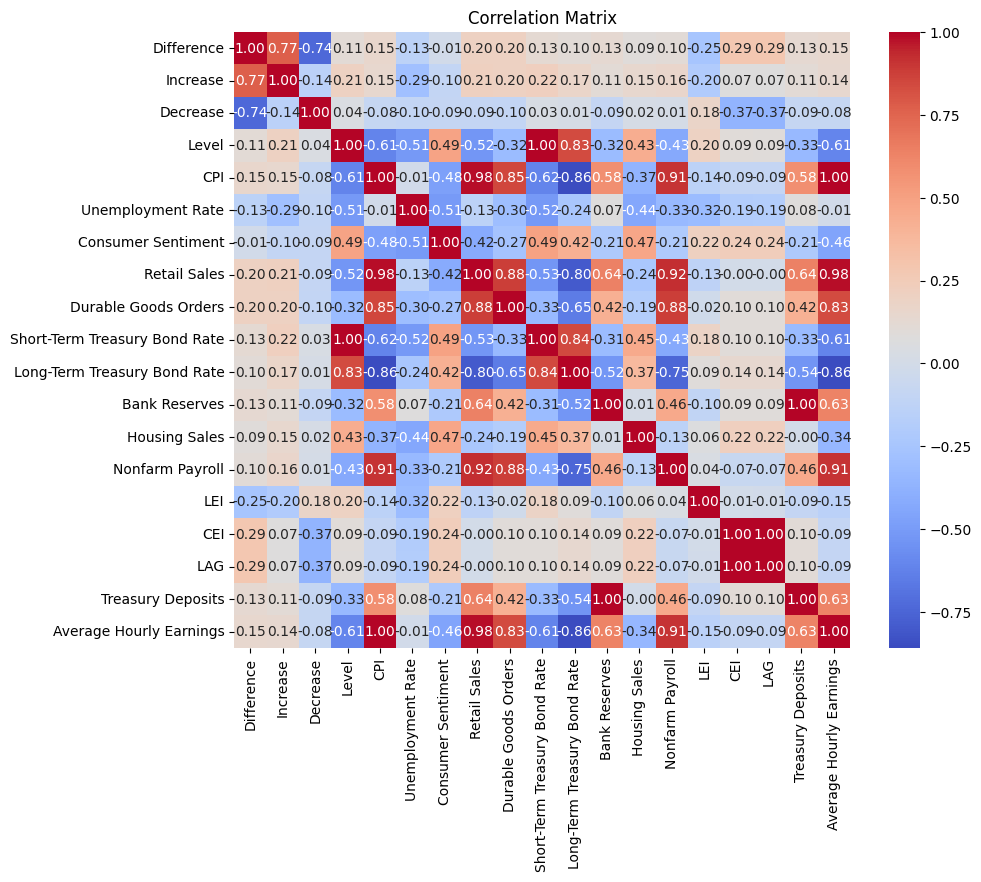

In [40]:
clean_data_numeric = clean_data.select_dtypes(include='number')
summary_stats = clean_data_numeric.describe()
print(summary_stats)
correlation_matrix = clean_data_numeric.corr()
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

       Difference    Increase    Decrease       Level         CPI  \
count  242.000000  242.000000  242.000000  242.000000  242.000000   
mean     0.020661    0.067149    0.046488    2.521694  208.593198   
std      0.224502    0.152385    0.144606    2.154387   40.844843   
min     -1.000000    0.000000    0.000000    0.250000  142.800000   
25%      0.000000    0.000000    0.000000    0.250000  172.925000   
50%      0.000000    0.000000    0.000000    1.750000  211.689000   
75%      0.000000    0.000000    0.000000    4.750000  237.714000   
max      0.750000    0.750000    1.000000    6.500000  302.918000   

       Unemployment Rate  Consumer Sentiment   Retail Sales  \
count         242.000000          242.000000     242.000000   
mean            5.715289           86.820661  329021.123967   
std             1.795052           13.211669  109754.886537   
min             3.400000           50.000000  154752.000000   
25%             4.400000           77.525000  249830.000000   


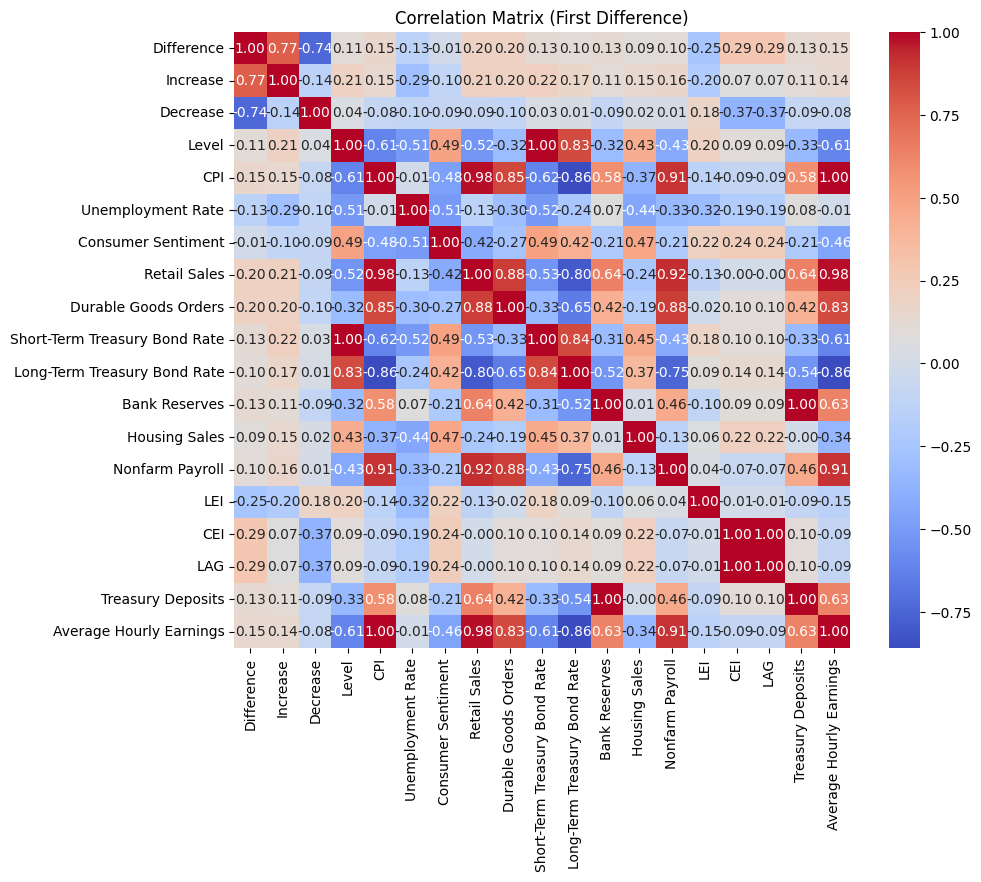

In [41]:
clean_data_numeric_diff = clean_data.select_dtypes(include='number')
summary_stats_diff = clean_data_numeric_diff.describe()
print(summary_stats_diff)
correlation_matrix_diff = clean_data_numeric_diff.corr()
print(correlation_matrix_diff)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_diff, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix (First Difference)')
plt.show()

In [42]:
clean_data.to_csv(r'C:\Users\abact\BC-Project\data\clean_data.csv', index=False)